# <h1>Homework 2

# <h1> Problem 1
We have been given the following function <br/>
$ f = 2x_{1}^2 - 4x_{1}x_{2} + 1.5x_{2}^2 + x_{2}
$
<br/>
First, let's find the stationary point <br/>
$i.e \; (x_{1},x_{2})$ where $\frac{\partial f}{\partial x_1} = 0$ and $\frac{\partial f}{\partial x_2} = 0$
simultaneously
<br/>
Thus, $\frac{\partial f}{\partial x_1} = 4x_{1} - 4x_{2} \rightarrow (1)$
<br/> and <br/>
$\frac{\partial f}{\partial x_2} = -4x_{1} + 3x_{2} + 1 \rightarrow (2)$
<br/> Solving $(1)$ and $(2)$ simultaneously we get,
$(x_{1},x_{2}) = [1,1]$
<br/> Thus, stationary point of the function is $[1,1]$
<br/> To find whether a point is saddle point for the function or not, we need to compute its hessian
at the point.<br/>
Therefore, $H = \begin{bmatrix}
   \frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial^2 f}{\partial x_{1}x_{2}}\\
   \frac{\partial^2 f}{\partial x_{2}x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2}
  \end{bmatrix}$
 <br/>
 $H = \begin{bmatrix}
 4 & -4\\
 -4 & 3
 \end{bmatrix}$

In [5]:
import numpy as np
from numpy import linalg as la
eig,v = la.eig(np.array([[4 ,-4],[-4,3]]))
print(eig)

[ 7.53112887 -0.53112887]


<br/> The resulting Hessian is an indefinite matrix, since the matrix eigen values are both positive and negative.
Hence, for this function all stationary points are saddle points.

<h1> Problem 2<br/>
<h2> Part a

In this problem, we are asked to find the point on plane
$x_{1} + 2x_{2} + 3x_{3} = 1$ closest to the point $(- 1,0,1)^{T}$
<br/> Firstly, to convert this into an unconstrained problem we substitute <br/>
$x_{1} = 1 - 2x_{2} - 3x_{3}$ <br/>
Let the point be $(x_{1}^{*},x_{2}^{*},x_{3}^{*})$<br/>
Thus, distance of given point from closest point can be represented as <br/>
$D = \sqrt{(-1 -1 + 2x_{2} + 3x_{3})^{2} + (0-x_{2})^{2} + (1-x_{3})^{2} }$
<br/>Thus, our job is to
<br/> $minimize \; D$

In [7]:
import numpy as np
import math
from scipy.optimize import minimize

In [30]:
def cost_func(x):
    return math.sqrt((-2+2*x[0]+3*x[1])**2+(x[0])**2+(1-x[1])**2)

In [31]:
x0 = np.array([-1,-1])
sol = minimize(cost_func,x0)

In [32]:
print("[x2,x3] = ",sol.x)
print("x1 = ",1-2*sol.x[0]-3*sol.x[1])

[x2,x3] =  [-0.14285709  0.78571426]
x1 =  -1.071428598689087


Thus the point on plane $x_{1} + 2x_{2} + 3x_{3} = 1$ closest to the point $(- 1,0,1)^{T}$ is
$\begin{bmatrix}
x_{1}\\
x_{2}\\
x_{3}
\end{bmatrix}$ = $
\begin{bmatrix}
-1.0714\\
-0.1428\\
0.7857
\end{bmatrix}$

<h2> Part b

In this problem, we first solve the optimization problem using gradient descent algorithm. The gradient descent
algorithm implies that, <br/>
for a function $f(x)$ that is differentiable, point $a^*$ that minimizes $f(x)$ is reached fastest if we go
from $a_0$ in the direction of $a-\nabla f(x)$ i.e. the negative gradient.<br/>
We have already defined the function $D$ in the above problem. Minimizing $D$ is same as minimizing $D^2$.
<br/>Thus, $\nabla D^2 = \begin{bmatrix}
-8+10x_{2}+12x_{3}\\
-14+12x_{2}+20x_{3}
\end{bmatrix}$

In [33]:
def cost_func(x):
    return -8+10*x[0]+12*x[1],-14+12*x[0]+20*x[1]

Lets run the gradient descent for 200 iterations and plot the convergance. Let's assume $\gamma = 0.05$ i.e.
the learning rate.

In [54]:
a = np.array([0,0])
gamma = np.array(0.05)
optim = np.array([-0.14285709,0.78571426])
error = []
for x in range(500):
    a = a - gamma*cost_func(a)
    error.append((a-optim)**2)

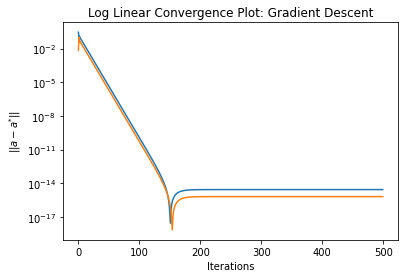

In [65]:
import matplotlib.pyplot as plt
plt.figure(1);plt.clf()
plt.plot(error)
plt.gca().set_yscale('log')
plt.xlabel('Iterations')
plt.ylabel('$||a-a^{*}||$')
plt.title('Log Linear Convergence Plot: Gradient Descent')
plt.show()

In [57]:
print("[x2,x3] = ",a)
print("x1 = ",1-2*a[0]-3*a[1])


[x2,x3] =  [-0.14285714  0.78571429]
x1 =  -1.0714285714285714
